<a href="https://colab.research.google.com/github/muhammadFathony/fundamentals_machine_learning/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# Ini diformat sebagai kode
```

# Import TensorFlow

In [7]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib.pyplot as plt
import os

# Download Dataset

In [2]:
!gdown 1MiN1r-XGouuTcdms6t8avQFn3hx_pswO

Downloading...
From (original): https://drive.google.com/uc?id=1MiN1r-XGouuTcdms6t8avQFn3hx_pswO
From (redirected): https://drive.google.com/uc?id=1MiN1r-XGouuTcdms6t8avQFn3hx_pswO&confirm=t&uuid=cfd9697d-e083-4ce1-9b42-47a8919701cd
To: /content/Dogs & Cats Images.zip
100% 456M/456M [00:09<00:00, 49.6MB/s]


In [3]:
! unzip "/content/Dogs & Cats Images.zip"

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: dog vs cat/dataset/training_set/cats/cat.37.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.370.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3700.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3701.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3702.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3703.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3704.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3705.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3706.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3707.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3708.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3709.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.371.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3710.jpg  
  inflating: dog vs cat/dataset/tra

In [4]:
base_dir = '/content/dataset'
train_dir = os.path.join(base_dir, 'training_set')
test_dir = os.path.join(base_dir, 'test_set')

In [5]:
os.listdir(train_dir)

['dogs', 'cats']

In [6]:
os.listdir(test_dir)

['dogs', 'cats']

# Augmentasi gambar

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=400,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=400,
        class_mode='binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


# Membangun Model

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(
      train_generator,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=5)

Epoch 1/5
20/20 [==============================] - 126s 5s/step - loss: 0.8423 - accuracy: 0.5106 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 2/5
20/20 [==============================] - 105s 5s/step - loss: 0.6871 - accuracy: 0.5512 - val_loss: 0.6769 - val_accuracy: 0.5660
Epoch 3/5
20/20 [==============================] - 104s 5s/step - loss: 0.6592 - accuracy: 0.5972 - val_loss: 0.6669 - val_accuracy: 0.6085
Epoch 4/5
20/20 [==============================] - 105s 5s/step - loss: 0.6149 - accuracy: 0.6554 - val_loss: 0.5879 - val_accuracy: 0.6810
Epoch 5/5
20/20 [==============================] - 105s 5s/step - loss: 0.5822 - accuracy: 0.6939 - val_loss: 0.5598 - val_accuracy: 0.7220


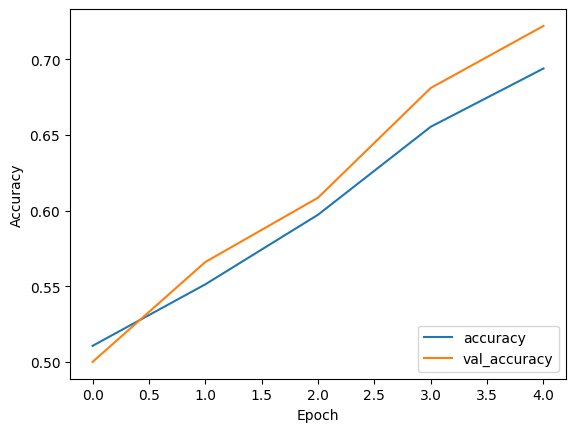

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Transfer Learning

In [ ]:
from keras.applications import Xception

In [ ]:
base_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

83683744/83683744 [==============================] - 0s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
model = tf.keras.models.Sequential([
    base_model,

    layers.Flatten(),

    layers.Dense(256,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1,activation='sigmoid'),
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 dense_2 (Dense)             (None, 256)               25690368  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 46552105 (177.58 MB)
Trainable params: 25690625 (98.00 MB)
Non-trainable params: 20861480 (79.58 MB)
_________________________________________________________________


In [ ]:
optimizer = optimizers.Adam()

In [ ]:
model.compile(optimizer=optimizer,
             loss="binary_crossentropy",
              metrics=['accuracy']
             )

In [ ]:
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator
)

Epoch 1/5
20/20 [==============================] - 148s 6s/step - loss: 1.4851 - accuracy: 0.9249 - val_loss: 0.4254 - val_accuracy: 0.9840
Epoch 2/5
20/20 [==============================] - 118s 6s/step - loss: 0.3649 - accuracy: 0.9799 - val_loss: 0.2030 - val_accuracy: 0.9850
Epoch 3/5
20/20 [==============================] - 118s 6s/step - loss: 0.1670 - accuracy: 0.9811 - val_loss: 0.0895 - val_accuracy: 0.9880
Epoch 4/5
20/20 [==============================] - 120s 6s/step - loss: 0.0498 - accuracy: 0.9816 - val_loss: 0.0657 - val_accuracy: 0.9865
Epoch 5/5
20/20 [==============================] - 119s 6s/step - loss: 0.0380 - accuracy: 0.9866 - val_loss: 0.0660 - val_accuracy: 0.9880


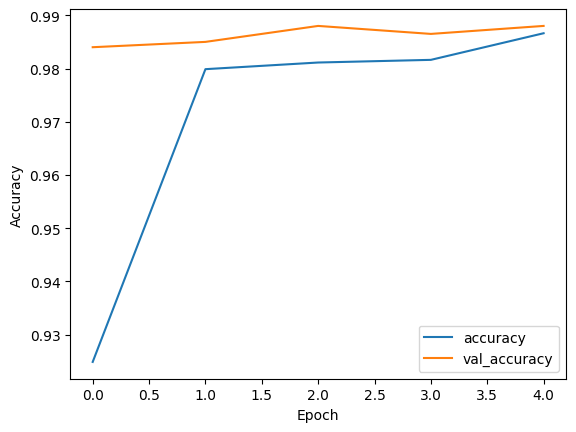

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')